# Kadir Berat YILDIRIM - 090150122

# Pandas - Time Series

## Classes :

- timestamp
- DatetimeIndex
- Period
- PeriodIndex

In [1]:
from datetime import datetime
now = datetime.now()
print(now)
print(now.year, now.month, now.day)

2019-12-25 13:55:01.714322
2019 12 25


In [7]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print(delta)
print(delta.days)
print(delta.resolution)
print(delta.seconds)

926 days, 15:45:00
926
0:00:00.000001
56700


In [8]:
from datetime import timedelta
start = datetime(2011, 1, 7)
print(start + timedelta(12))
print(start - 2 * timedelta(12))

2011-01-19 00:00:00
2010-12-14 00:00:00


## Types in datetime module

- date
- time
- datetime
- timedelta

# Converting between string and datetime

In [10]:
stamp = datetime(2011, 1, 3)
print(str(stamp))
print(stamp.strftime('%Y-%m-%d'))

2011-01-03 00:00:00
2011-01-03


### Datetime format specification

- %Y : 4 digit year
- %y : 2 digit year
- %m : 2 digit month 
- %d : 2 digit day
- %H : hour (24 hour clock)
- %I : hour (12 hour clock)
- %M : 2 digit minute
- %S : second
- %w : week day as integer

In [11]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

## Parse

In [12]:
from dateutil.parser import parse
parse('2011-01-03')


datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

## Time series basics

In [14]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [53]:
import pandas as pd
import numpy as np

ts = pd.Series(np.random.randn(6), index = dates)

In [19]:
ts

2011-01-02    0.782932
2011-01-05    0.914146
2011-01-07    0.891561
2011-01-08    1.477450
2011-01-10   -1.260641
2011-01-12   -1.048039
dtype: float64

In [20]:
type(ts)

pandas.core.series.Series

In [21]:
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [22]:
ts[2:4]

2011-01-07    0.891561
2011-01-08    1.477450
dtype: float64

In [23]:
ts + ts[2:4]

2011-01-02         NaN
2011-01-05         NaN
2011-01-07    1.783123
2011-01-08    2.954900
2011-01-10         NaN
2011-01-12         NaN
dtype: float64

In [24]:
ts.index.strftime("%y/%B,%A")

Index(['11/January,Sunday', '11/January,Wednesday', '11/January,Friday',
       '11/January,Saturday', '11/January,Monday', '11/January,Wednesday'],
      dtype='object')

In [25]:
ts.index = ts.index.strftime("%y/%B, %A")

In [26]:
ts

11/January, Sunday       0.782932
11/January, Wednesday    0.914146
11/January, Friday       0.891561
11/January, Saturday     1.477450
11/January, Monday      -1.260641
11/January, Wednesday   -1.048039
dtype: float64

In [27]:
type(ts.index)

pandas.core.indexes.base.Index

## to_datetime function

In [28]:
pd.to_datetime(['2005/11/23', '2010.12.31'])

DatetimeIndex(['2005-11-23', '2010-12-31'], dtype='datetime64[ns]', freq=None)

In [29]:
time = pd.to_datetime(['2005/11/23', '2010.12.31'])

In [30]:
time

DatetimeIndex(['2005-11-23', '2010-12-31'], dtype='datetime64[ns]', freq=None)

In [31]:
time[0]

Timestamp('2005-11-23 00:00:00')

In [32]:
pd.to_datetime('2010/11/12', format = '%Y/%m/%d')

Timestamp('2010-11-12 00:00:00')

In [33]:
pd.to_datetime('12-11-2010 00:00', format = '%d-%m-%Y %H:%M')

Timestamp('2010-11-12 00:00:00')

In [34]:
df = pd.DataFrame({'year' : [2015, 2016], 'month' : [2, 3], 'day' : [4, 5], 'hour' : [2, 3]})

In [35]:
df

,year,month,day,hour
0,2015,2,4,2
1,2016,3,5,3


In [36]:
df['time'] = pd.to_datetime(df[['year', 'month', 'day']])

In [37]:
df

,year,month,day,hour,time
0,2015,2,4,2,2015-02-04
1,2016,3,5,3,2016-03-05


In [38]:
pd.to_datetime(['2009/07/31', 'asd'])

ParserError: Unknown string format: asd

In [39]:
a = pd.to_datetime(['2009/07/31', 'asd'], errors = 'coerce')

In [40]:
a

DatetimeIndex(['2009-07-31', 'NaT'], dtype='datetime64[ns]', freq=None)

In [41]:
a[0]

Timestamp('2009-07-31 00:00:00')

In [42]:
a[1]

NaT

In [43]:
ts

11/January, Sunday       0.782932
11/January, Wednesday    0.914146
11/January, Friday       0.891561
11/January, Saturday     1.477450
11/January, Monday      -1.260641
11/January, Wednesday   -1.048039
dtype: float64

In [44]:
stamp = ts.index[2]

In [45]:
stamp

'11/January, Friday'

In [46]:
ts[stamp]

0.8915614616605679

## Indexing, Selection, Subsetting

In [49]:
from datetime import datetime
import pandas as pd
import numpy as np

longer_ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods = 1000))

In [50]:
longer_ts['2001']

2001-01-01    0.952130
2001-01-02   -1.039083
2001-01-03    0.993351
2001-01-04   -0.886710
2001-01-05   -1.144734
                ...   
2001-12-27   -0.631232
2001-12-28    0.918310
2001-12-29   -1.004068
2001-12-30   -0.149284
2001-12-31    1.485841
Freq: D, Length: 365, dtype: float64

In [51]:
longer_ts['2001-05']

2001-05-01   -1.211150
2001-05-02    0.702565
2001-05-03    0.231693
2001-05-04   -2.153729
2001-05-05    1.439161
2001-05-06    0.777200
2001-05-07    0.208992
2001-05-08    0.063903
2001-05-09    0.611480
2001-05-10    0.143847
2001-05-11    2.023272
2001-05-12   -1.335813
2001-05-13    1.069471
2001-05-14   -2.291211
2001-05-15    0.224967
2001-05-16    0.854662
2001-05-17   -1.892064
2001-05-18   -0.073627
2001-05-19    0.721698
2001-05-20   -0.145069
2001-05-21    0.903971
2001-05-22    0.489250
2001-05-23   -2.222455
2001-05-24   -0.481200
2001-05-25    0.250943
2001-05-26   -0.566232
2001-05-27    1.929415
2001-05-28   -0.521842
2001-05-29   -0.280533
2001-05-30    1.536864
2001-05-31    0.661919
Freq: D, dtype: float64

In [54]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.301768
2011-01-08    0.359652
2011-01-10    0.178558
2011-01-12    1.538333
dtype: float64

In [55]:
longer_ts.truncate(before = "1/1/2001", after = "1/5/2001")

2001-01-01    0.952130
2001-01-02   -1.039083
2001-01-03    0.993351
2001-01-04   -0.886710
2001-01-05   -1.144734
Freq: D, dtype: float64

In [56]:
from datetime import datetime
import pandas as pd
import numpy as np

dates = pd.date_range("1/1/2000", periods = 100, freq = "W-WED")
long_df = pd.DataFrame(np.random.randn(100, 4), index = dates, columns = ['Colorado', 'Texas', 'New York', 'Erzincan'])

In [57]:
long_df

,Colorado,Texas,New York,Erzincan
2000-01-05,0.350861,-0.642427,-0.274503,0.140464
2000-01-12,-0.101928,1.051788,-0.268001,0.009702
2000-01-19,0.520275,-0.614560,2.091370,-0.289754
2000-01-26,1.380791,0.565550,1.011404,-1.711410
2000-02-02,-0.324988,-1.519898,0.498504,0.108367
...,...,...,...,...
2001-10-31,-0.965780,-0.329924,0.126091,-1.522072
2001-11-07,-0.019448,-0.564129,-0.152742,-1.784309
2001-11-14,1.493384,-0.126938,0.634621,1.054110
2001-11-21,1.083399,-0.840813,-0.358251,0.195146


In [58]:
long_df.loc["2001-05"]

,Colorado,Texas,New York,Erzincan
2001-05-02,-1.506889,0.930772,-0.252870,0.104571
2001-05-09,-0.993301,2.187511,-0.811415,-0.422714
2001-05-16,0.227162,-0.499531,1.142987,1.215431
2001-05-23,1.207484,-1.224038,1.504583,-1.664717
2001-05-30,-0.109936,-1.208742,-1.508792,0.455863


In [59]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index = dates)

In [60]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [61]:
dup_ts['1/3/2000']

4

In [62]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [63]:
dup_ts.index.is_unique

False

## Pandas Timestamp

In [64]:
stamp = pd.Timestamp('2012-05-01')

In [66]:
stamp.day

1

In [67]:
stamp.year

2012

### Generating date ranges

In [68]:
index = pd.date_range('4/1/2012', '6/1/2012')

In [69]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [70]:
dates = pd.date_range(start = '4/1/2012', periods = 20)
dates

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [71]:
pd.date_range(end = '6/1/2012', periods = 20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [72]:
pd.date_range('1/1/2000', '12/1/2000', freq = 'BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [73]:
pd.date_range('5/2/2012 12:56:31', periods = 5, normalize = True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [74]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [75]:
pytz.common_timezones[:]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Wi

In [76]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [78]:
stamp_utc = stamp.tz_localize('utc')

In [79]:
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [80]:
stamp_utc.tz_convert("US/Eastern")

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [81]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz = 'Europe/Moscow')

In [82]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

## Resampling with GroupBy

In [83]:
rng = pd.date_range('1/1/2000', periods = 1000, freq = 'D')

In [84]:
ts = pd.Series(np.random.randint(50, 70, 1000), index = rng)

In [85]:
ts.groupby(lambda x : x.month).mean()

1     59.462366
2     58.870588
3     59.946237
4     59.444444
5     58.526882
6     59.700000
7     59.451613
8     59.043011
9     59.709302
10    60.032258
11    59.483333
12    59.661290
dtype: float64

# What are lambda functions in Python?

In Python, anonymous function is a function that is defined without a name.

While normal functions are defined using the def keyword, in Python anonymous functions are defined using the lambda keyword.

Hence, anonymous functions are also called lambda functions.
How to use lambda Functions in Python?

A lambda function in python has the following syntax.
Syntax of Lambda Function in python

lambda arguments: expression

Lambda functions can have any number of arguments but only one expression. The expression is evaluated and returned. Lambda functions can be used wherever function objects are required.

## Time series Plotting

In [86]:
from pandas_datareader import data, wb

In [89]:
f = data.DataReader("MSFT", data_source = "yahoo", start = datetime(2015, 1, 1), end = datetime(2017, 1, 1))

In [90]:
f.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,41.979183
2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,41.593143
2015-01-06,46.750000,45.540001,46.380001,45.650002,36447900.0,40.982681
2015-01-07,46.459999,45.490002,45.980000,46.230000,29114100.0,41.503380
2015-01-08,47.750000,46.720001,46.750000,47.590000,29645200.0,42.724323


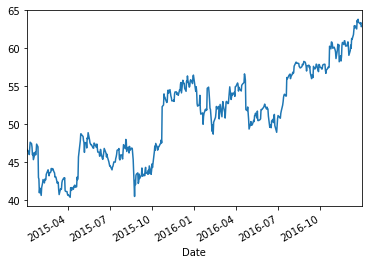

In [91]:
f["Open"].plot()

In [95]:
f = web.DataReader("MSFT", data_source = "yahoo", start = datetime(2015, 1, 1), end = datetime(2017, 1, 1))
f.head()

NameError: name 'web' is not defined

***

In [96]:
weekly = f.resample("W").mean()

In [97]:
weekly

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-04,47.419998,46.540001,46.660000,46.759998,27913900.0,41.979183
2015-01-11,47.102000,46.180001,46.618000,46.598000,31765060.0,41.833749
2015-01-18,46.870000,45.724000,46.376000,46.128000,31417640.0,41.411801
2015-01-25,46.830000,45.982500,46.495000,46.655000,34338150.0,41.884921
2015-02-01,43.364001,42.130000,43.034000,42.653999,87557360.0,38.292987
...,...,...,...,...,...,...
2016-12-04,60.646001,59.738000,60.208001,60.082000,27562500.0,56.927941
2016-12-11,61.200001,60.226000,60.524000,60.904000,24567780.0,57.706792
2016-12-18,63.054000,62.182000,62.594000,62.542000,31278540.0,59.258803


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f975ef34a90>,
      dtype=object)

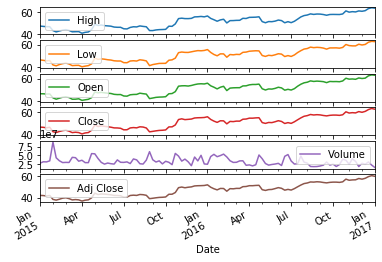

In [98]:
weekly.plot(subplots = True)